In [1]:
import pandas as pd
from deepface import DeepFace

In [2]:
df = pd.read_csv('../../dataset/Labeled Faces in the University Students Dataset/master.csv')
df.head()

,file_x,file_y,Decision
0,1.jpg,2.jpg,No
1,1.jpg,3.jpg,No
2,1.jpg,32.jpg,Yes
3,2.jpg,3.jpg,No
4,2.jpg,33.jpg,Yes


In [3]:
df['file_x'] = '../../dataset/Labeled Faces in the University Students Dataset/' + df['file_x'].astype(str)
df['file_y'] = '../../dataset/Labeled Faces in the University Students Dataset/' + df['file_y'].astype(str)

In [4]:
instances = df[["file_x", "file_y"]].values.tolist()
instances

[['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/2.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/3.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/32.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/3.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/33.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/5.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/3.jpg',
  '../../dataset/Labeled Faces

In [5]:
model_name = "VGG-Face"
distance_metric = "euclidean"

In [6]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification: 100%|██████████| 44/44 [22:57<00:00, 31.31s/it]


In [7]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [8]:
df["distance"] = distances
df.head()

,file_x,file_y,Decision,distance
0,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.4650
1,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.5162
2,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.0000
3,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.5170
4,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.0000


In [9]:
#!pip3 install scipy

<AxesSubplot:ylabel='Density'>

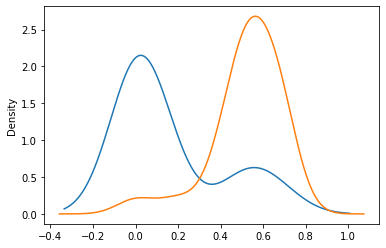

In [10]:
df[df.Decision == "Yes"].distance.plot.kde()
df[df.Decision == "No"].distance.plot.kde()

In [11]:
#!pip install chefboost
from chefboost import Chefboost as chef

In [12]:
config = {'algorithm': 'C4.5'}

In [13]:
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.39199328422546387  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  84.0909090909091 % on  44  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[21, 5], [2, 16]]
Precision:  80.7692 %, Recall:  91.3043 %, F1:  85.7142 %


In [14]:
threshold = 0.348 #comes from c4.5 algorithm

In [15]:
df["prediction"] = "No"

In [16]:
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'

In [17]:
df.sample(5)

,file_x,file_y,Decision,distance,prediction
40,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.0000,Yes
12,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.0000,Yes
41,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.6360,No
2,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.0000,Yes
9,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.5373,No


In [18]:
#!pip install scikit-learn

from sklearn.metrics import confusion_matrix,roc_curve,auc

In [19]:
cm = confusion_matrix(df.Decision.values, df.prediction.values)

In [20]:
tn, fp, fn, tp = cm.ravel()

In [21]:
tn, fp, fn, tp

(21, 2, 5, 16)

In [22]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [23]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  88.88888888888889 %
Recall:  76.19047619047619 %
F1 score  82.05128205128204 %
Accuracy:  84.0909090909091 %


In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df["p"] = "No"
roc_point=[]

In [26]:
thresholds = list(np.array(list(range(1,100,1)))/100)
for threshold in thresholds:
    idx = df[df.distance <= threshold].index
    df.loc[idx, 'p'] = 'Yes'
    cm = confusion_matrix(df.Decision.values, df.p.values)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = tp / (tp + fp)
    roc_point.append([tpr,fpr])
roc_point

[[0.5714285714285714, 0.9230769230769231],
 [0.5714285714285714, 0.9230769230769231],
 [0.5714285714285714, 0.9230769230769231],
 [0.5714285714285714, 0.9230769230769231],
 [0.5714285714285714, 0.9230769230769231],
 [0.5714285714285714, 0.9230769230769231],
 [0.5714285714285714, 0.9230769230769231],
 [0.5714285714285714, 0.9230769230769231],
 [0.5714285714285714, 0.9230769230769231],
 [0.5714285714285714, 0.9230769230769231],
 [0.5714285714285714, 0.9230769230769231],
 [0.7619047619047619, 0.9411764705882353],
 [0.7619047619047619, 0.9411764705882353],
 [0.7619047619047619, 0.9411764705882353],
 [0.7619047619047619, 0.9411764705882353],
 [0.7619047619047619, 0.9411764705882353],
 [0.7619047619047619, 0.9411764705882353],
 [0.7619047619047619, 0.9411764705882353],
 [0.7619047619047619, 0.9411764705882353],
 [0.7619047619047619, 0.8888888888888888],
 [0.7619047619047619, 0.8888888888888888],
 [0.7619047619047619, 0.8888888888888888],
 [0.7619047619047619, 0.8888888888888888],
 [0.7619047

In [27]:
pivot = pd.DataFrame(roc_point,columns = ['tpr','fpr'])
pivot["threshold"] = thresholds
pivot  

,tpr,fpr,threshold
0,0.571429,0.923077,0.01
1,0.571429,0.923077,0.02
2,0.571429,0.923077,0.03
3,0.571429,0.923077,0.04
4,0.571429,0.923077,0.05
...,...,...,...
94,1.000000,0.477273,0.95
95,1.000000,0.477273,0.96
96,1.000000,0.477273,0.97
97,1.000000,0.477273,0.98


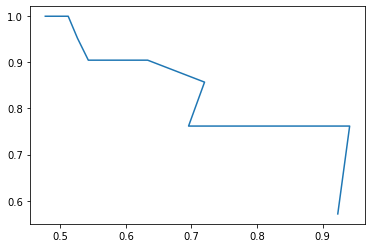

In [28]:
plt.plot(pivot.fpr,pivot.tpr)